# Workshop 8: Polynomial Regression On Anscombe's dataset

## Importing the libraries

In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import arviz as az
from scipy import stats

## Extracting the data and visualising it

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


Text(0, 0.5, 'y')

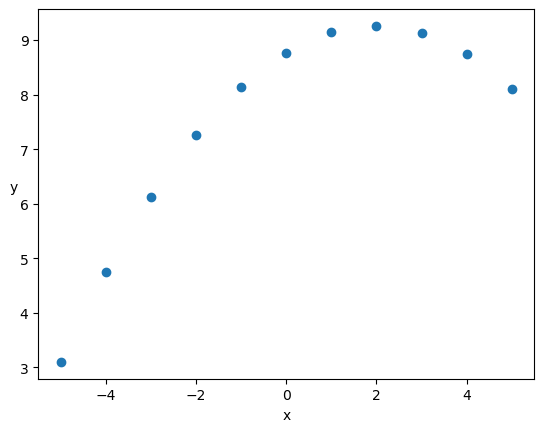

In [7]:
anscombe = sns.load_dataset('anscombe') # loading the dataset
print(anscombe.head())  # checking the dataset
x_2 = anscombe[anscombe.dataset == 'II']['x'].values   # extracting the x values for dataset III
y_2 = anscombe[anscombe.dataset == 'II']['y'].values   # extracting the y values for dataset III
 
x_2 = x_2 - x_2.mean() # centering the x values
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Defining The Model

### Quadratic model

In [10]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2 + β2 * x_2**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_poly = pm.sample(2000, tune=2000)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 25 seconds.


## Visualising The Quadratic Model

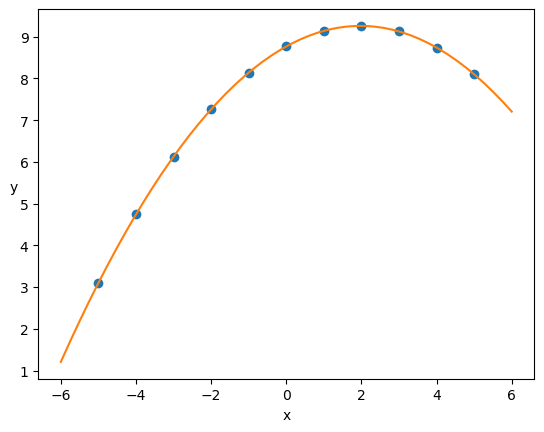

In [11]:
x_p = np.linspace(-6, 6)
y_p_poly = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2
x_p + trace_poly['β2'].mean() * x_p**2
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p_poly, c='C1')

### Cubic Model

In [13]:
with pm.Model() as model_cubic:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    β3 = pm.Normal('β3', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2 + β2 * x_2**2 + β3 * x_2**3
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_cubic = pm.sample(2000, tune=2000)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β3, β2, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 27 seconds.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6448046501056206, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


## Visualising cubic model

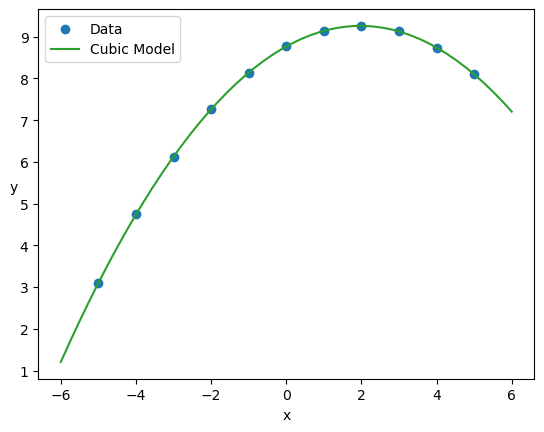

In [20]:
y_p_cubic = trace_cubic['α'].mean() + trace_cubic['β1'].mean() * x_p + trace_cubic['β2'].mean() * x_p**2 + trace_cubic['β3'].mean() * x_p**3

plt.scatter(x_2, y_2, label='Data')
plt.plot(x_p, y_p_cubic, c='C2', label='Cubic Model')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()


## Plotting both the models

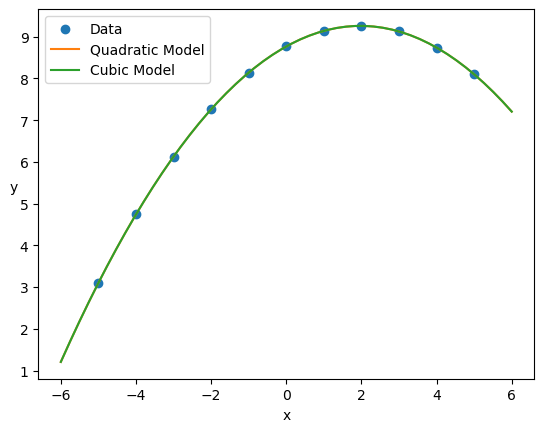

In [21]:
plt.scatter(x_2, y_2, label='Data')
plt.plot(x_p, y_p_poly, c='C1', label='Quadratic Model')
plt.plot(x_p, y_p_cubic, c='C2', label='Cubic Model')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()


## Conclusions <hr/>

- Since we are using the same dataset for both the quadratic and cubic models, it explains why we are getting similar results.    

  - When both models use the same input data, the additional complexity of the cubic model does not have an opportunity to affect the fit if the underlying data is inherently quadratic.  
<br/>

- In general, adding complexity to a model (like moving from quadratic to cubic) is helpful when the underlying relationship between variables is more intricate.
  - If the data is quadratic and you attempt to fit a cubic model, the cubic term might not significantly contribute to the fit.  
  
  - This can lead to the cubic model converging to a solution similar to the quadratic one, essentially approximating the quadratic relationship.

**Therefore, model complexity should match the underlying data complexity for accurate representation**
<hr/>

## Bonus: Implementing Linear Regression to showcase the inappropriateness of the model

In [23]:
with pm.Model() as model_linear:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_linear = pm.sample(2000, tune=2000)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 22 seconds.


## Visualising the linear model

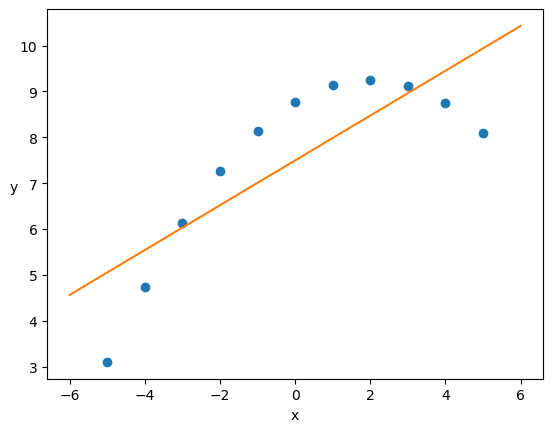

In [24]:
x_p = np.linspace(-6, 6)
y_p_linear = trace_linear['α'].mean() + trace_linear['β1'].mean() * x_p
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p_linear, c='C1')

### Final Remarks <hr/>

As you can see from the graph, the linear model is inappropriate for this case, as linear models can only capture linear patterns, so they struggle to fit data with higher-order relationships like quadratic or cubic patterns

It's important to choose a model that aligns with the inherent patterns in your data for accurate and meaningful predictions.